EXERCICIO DE SUPPORT VECTOR MACHINE - AULA 07 DE IA - 14-04-2020

CLASSIFICANDO OS TIPOS DE CANCER.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


Versão do SkLearn

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix

In [5]:
from mlxtend.plotting import plot_decision_regions

In [6]:
from sklearn.preprocessing import PolynomialFeatures

In [7]:
df_Cancer = pd.read_excel("breastCancer.xlsx", index_col = "id")
df_Cancer.head()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
id,,,,,,,,,,
1000025,5,1,1,1,2,1,3,1,1,2
1002945,5,4,4,5,7,10,3,2,1,2
1015425,3,1,1,1,2,2,3,1,1,2
1016277,6,8,8,1,3,4,3,7,1,2
1017023,4,1,1,3,2,1,3,1,1,2


Cancer do tipo 2 => verdadeiro Positivo
Câncer do tipo 4 => verdadeiro Negativo

In [8]:
X_Cancer = df_Cancer.iloc[:, 0:-1]
y_Cancer = df_Cancer.iloc[:, -1]
svm_clf_Cancer = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C = 1, loss = "hinge", penalty='l2', max_iter = 1000)),
])
svm_clf_Cancer.fit(X_Cancer, y_Cancer)
Predicao_Cancer = svm_clf_Cancer.predict(X_Cancer)
confusion_matrix(y_Cancer, Predicao_Cancer)

array([[432,  12],
       [  7, 232]], dtype=int64)

In [9]:
len(y_Cancer)

683

In [13]:
y_Cancer.value_counts()

2    444
4    239
Name: class, dtype: int64

COMPARO o class (CAMPO CLASSIFICAÇÃO DO CÂNCER) com Predicao_Cancer 

In [14]:
df_Cancer_Resultado = df_Cancer.copy()
df_Cancer_Resultado["Predicao_Cancer"] = Predicao_Cancer
df_Cancer_Resultado.head()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class,Predicao_Cancer
id,,,,,,,,,,,
1000025,5,1,1,1,2,1,3,1,1,2,2
1002945,5,4,4,5,7,10,3,2,1,2,4
1015425,3,1,1,1,2,2,3,1,1,2,2
1016277,6,8,8,1,3,4,3,7,1,2,4
1017023,4,1,1,3,2,1,3,1,1,2,2


$ W = X^T * y * Constante * qsi(ERRO) $
- Onde a Contante por padrão é igua a 1
- Constatne alta, maior que 1, vc. considera mais o erro, ou aceita mais o erro.
- Constante baixa, menor que 1, qto mais próximo de 0, aceita menos o erro (pagar o preço)


In [19]:
df_Cancer_Resultado.iloc[5:15,-2:]

,class,Predicao_Cancer
id,,
1017122,4,4
1018099,2,2
1018561,2,2
1033078,2,2
1033078,2,2
1035283,2,2
1036172,2,2
1041801,4,2
1043999,2,2


In [20]:
from sklearn.metrics import accuracy_score

In [21]:
Acuracia_Cancer = accuracy_score(y_Cancer, Predicao_Cancer)
Acuracia_Cancer = round(Acuracia_Cancer * 100, 2)
Acuracia_Cancer

97.22

PLOTAR

C:\Users\emilia\Anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:247: UserWarning: No contour levels were found within the data range.
  antialiased=True)


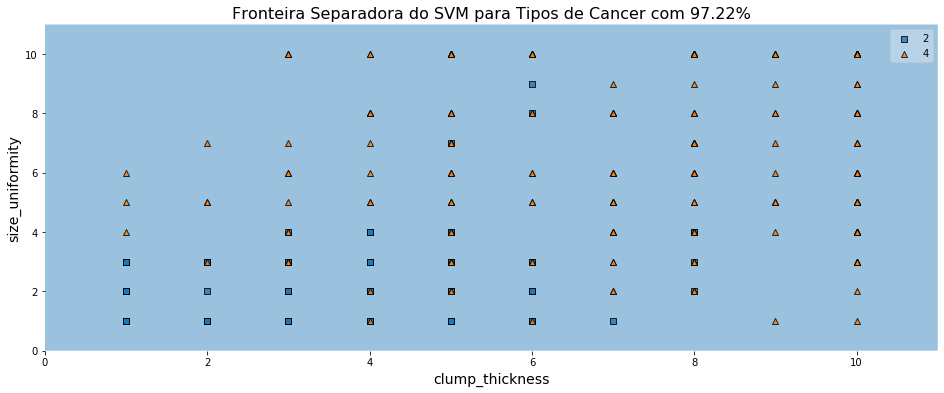

In [22]:
valor = 10
plt.figure(figsize = (16, 6))
Parametros_Plot_mlxtend = {"X" : X_Cancer.values,
                           "y" : y_Cancer.values,
                           "clf" : svm_clf_Cancer,
                           "filler_feature_values" : {2: valor, 3: valor, 4: valor, 5: valor, 6: valor, 7: valor, 8: valor},
                           "filler_feature_ranges" : {2: valor, 3: valor, 4: valor, 5: valor, 6: valor, 7: valor, 8: valor}
                          }
plot_decision_regions(**Parametros_Plot_mlxtend)
plt.xlabel(X_Cancer.columns[0], size = 14)
plt.ylabel(X_Cancer.columns[1], size = 14)
plt.title(f'Fronteira Separadora do SVM para Tipos de Cancer com {Acuracia_Cancer}%', size = 16)
plt.show()

5.2.5. Rodar a base de Câncer com apenas 2 colunas

Comando para ver a correlação de cada coluna com o Y (class) e vou pegar apenas as duas colunas que tiverem maior correlação com o Y. Para isso já utilizei o sort para trazer ordenado.

In [25]:
df_Cancer.corr().iloc[:,-1:].sort_values(by = 'class')

,class
mitoses,0.423448
epithelial_size,0.690958
marginal_adhesion,0.706294
clump_thickness,0.714790
normal_nucleoli,0.718677
bland_chromatin,0.758228
size_uniformity,0.820801
shape_uniformity,0.821891
bare_nucleoli,0.822696
class,1.000000


VOU PEGAR APENAS AS DUAS COLUNAS MAIORES PARA NÃO SOBRECARREGAR O MEU MODELO. Utilizo o loc e pego todas as linhas e apenas as 2 colunas maiores e a class que é o Y

In [27]:
df_Cancer_Otima = df_Cancer.loc[:,["bare_nucleoli","shape_uniformity","class"]]

In [28]:
X_Cancer_Otima = df_Cancer_Otima.iloc[:, 0:-1]
y_Cancer_Otima = df_Cancer_Otima.iloc[:, -1]
svm_clf_Cancer_Otima = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C = 1, loss = "hinge", penalty='l2', max_iter = 1000)),
])
svm_clf_Cancer_Otima.fit(X_Cancer_Otima, y_Cancer_Otima)
Predicao_Cancer_Otima = svm_clf_Cancer_Otima.predict(X_Cancer_Otima)
confusion_matrix(y_Cancer_Otima, Predicao_Cancer_Otima)

array([[430,  14],
       [ 16, 223]], dtype=int64)

In [29]:
df_Cancer_Otima_Resultado = df_Cancer_Otima.copy()
df_Cancer_Otima_Resultado["Predicao_Cancer_Otima"] = Predicao_Cancer_Otima
df_Cancer_Otima_Resultado.head()

,bare_nucleoli,shape_uniformity,class,Predicao_Cancer_Otima
id,,,,
1000025,1,1,2,2
1002945,10,4,2,4
1015425,2,1,2,2
1016277,4,8,2,4
1017023,1,1,2,2


GERAR ACURACIA TAMBÉM para saber em porcentagem os acertos, que deu: 95,61% de acerto

In [30]:
Acuracia_Cancer_Otima = accuracy_score(y_Cancer_Otima, Predicao_Cancer_Otima)
Acuracia_Cancer_Otima = round(Acuracia_Cancer_Otima * 100, 2)
Acuracia_Cancer_Otima

95.61

PLOTAR O MODELO ÓTIMO

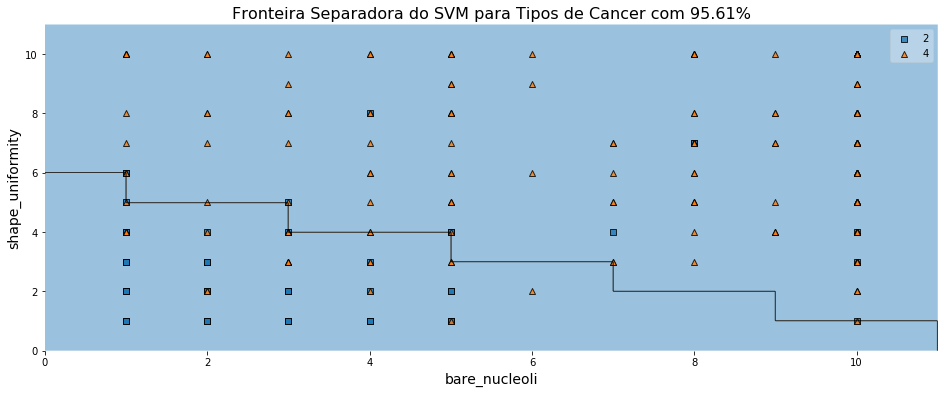

In [32]:
valor = 10
plt.figure(figsize = (16, 6))
Parametros_Plot_mlxtend = {"X" : X_Cancer_Otima.values,
                           "y" : y_Cancer_Otima.values,
                           "clf" : svm_clf_Cancer_Otima,
                           "filler_feature_values" : {2: valor, 3: valor, 4: valor, 5: valor, 6: valor, 7: valor, 8: valor},
                           "filler_feature_ranges" : {2: valor, 3: valor, 4: valor, 5: valor, 6: valor, 7: valor, 8: valor}
                          }
plot_decision_regions(**Parametros_Plot_mlxtend)
plt.xlabel(X_Cancer_Otima.columns[0], size = 14)
plt.ylabel(X_Cancer_Otima.columns[1], size = 14)
plt.title(f'Fronteira Separadora do SVM para Tipos de Cancer com {Acuracia_Cancer_Otima}%', size = 16)
plt.savefig("Gráfico_Cancer_Otima.jpg")
plt.show()